<a href="https://colab.research.google.com/github/Poorani23/SyncTech_Innovation_Data_Analysis/blob/main/EDA_on_Retail_Sales(Level_1(P1)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Retail_Sale/retail_sales_dataset.csv')

In [ ]:
df.shape

(1000, 9)

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.isnull()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
monthly_sales = df['Total Amount'].resample('M').sum()

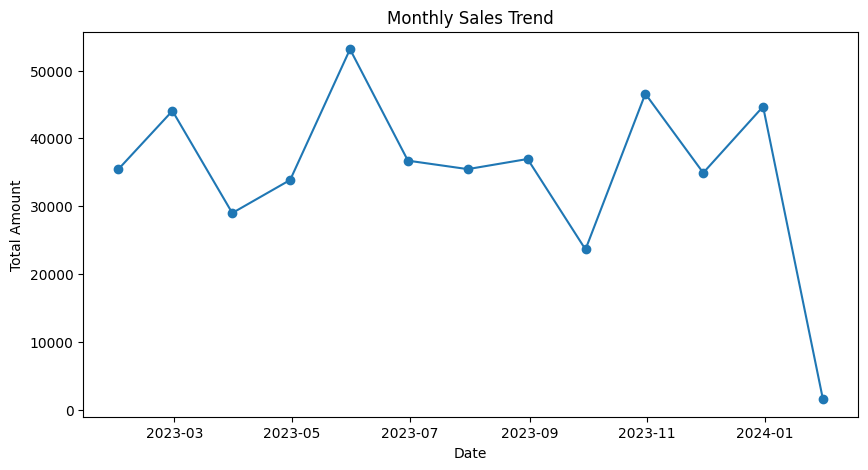

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

<ipython-input-51-eb37fb5cf059>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_spending.head(10).index, y=customer_spending.head(10).values, palette="viridis")


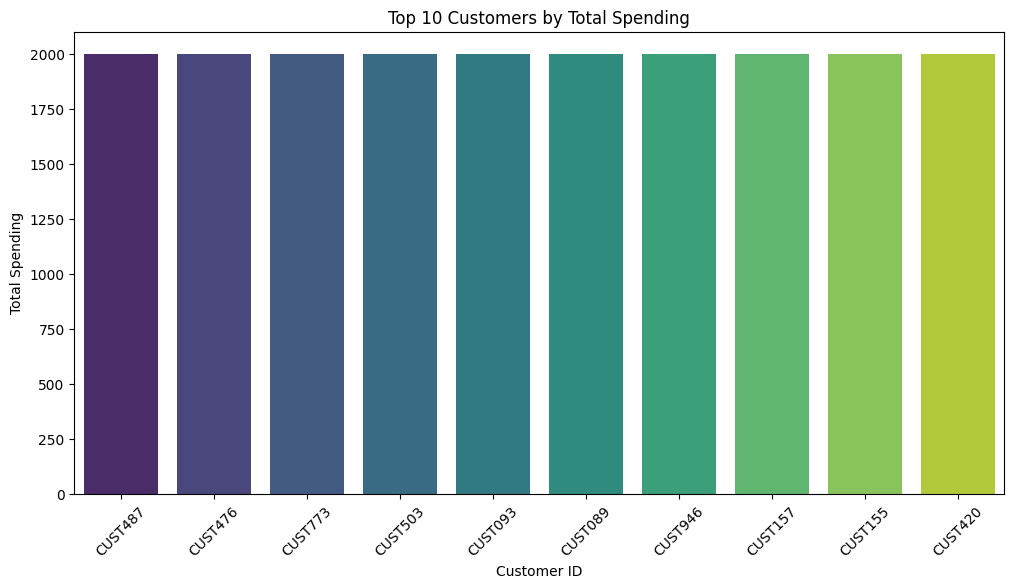

In [ ]:
customer_spending = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_spending.head(10).index, y=customer_spending.head(10).values, palette="viridis")
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-ca48f84daa1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_spending.index, y=gender_spending.values, palette="viridis")


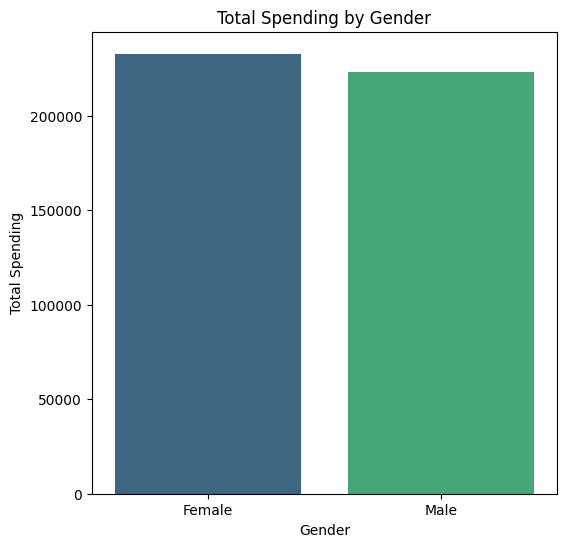

In [ ]:
gender_spending = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_spending.index, y=gender_spending.values, palette="viridis")
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

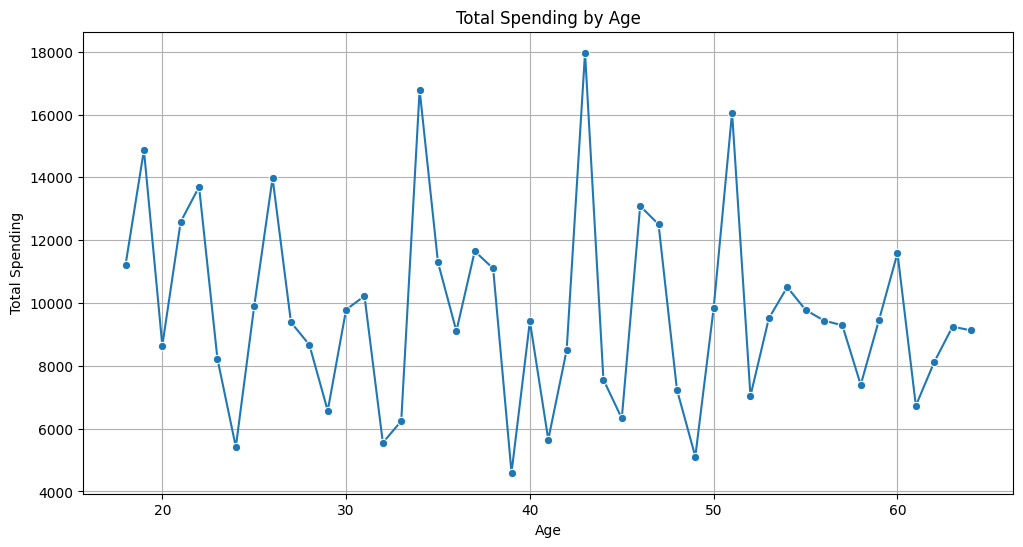

In [ ]:
age_spending = df.groupby('Age')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_spending.index, y=age_spending.values, marker='o', linestyle='-')
plt.title('Total Spending by Age')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

In [ ]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [ ]:
df.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
Date,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,26-35
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,26-35
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,46-55
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,36-45
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,26-35


<ipython-input-56-84e3aa3689e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_spending.index, y=age_group_spending.values, palette="viridis")


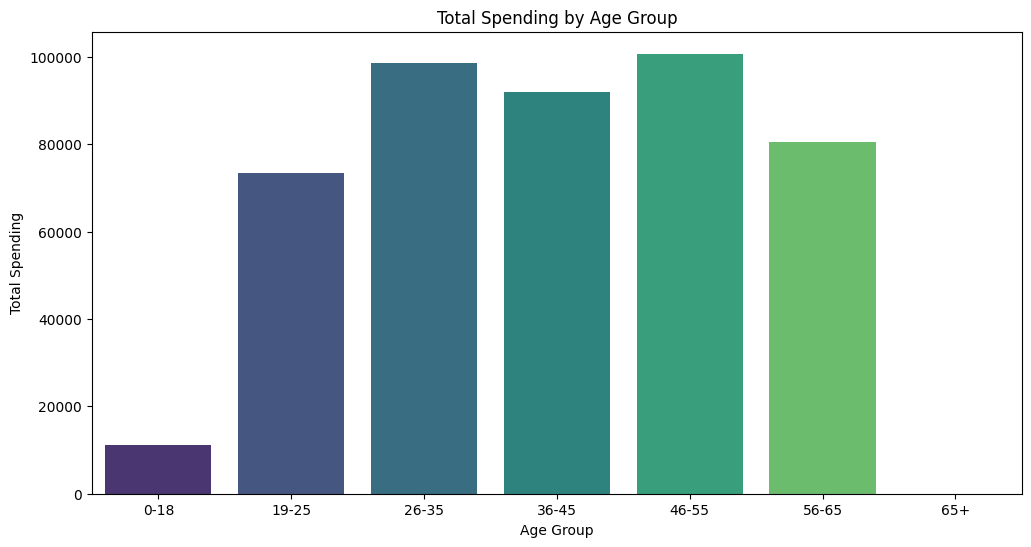

In [ ]:
age_group_spending = df.groupby('Age Group')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values, palette="viridis")
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.show()

<ipython-input-57-4fa3052b57ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette="viridis")


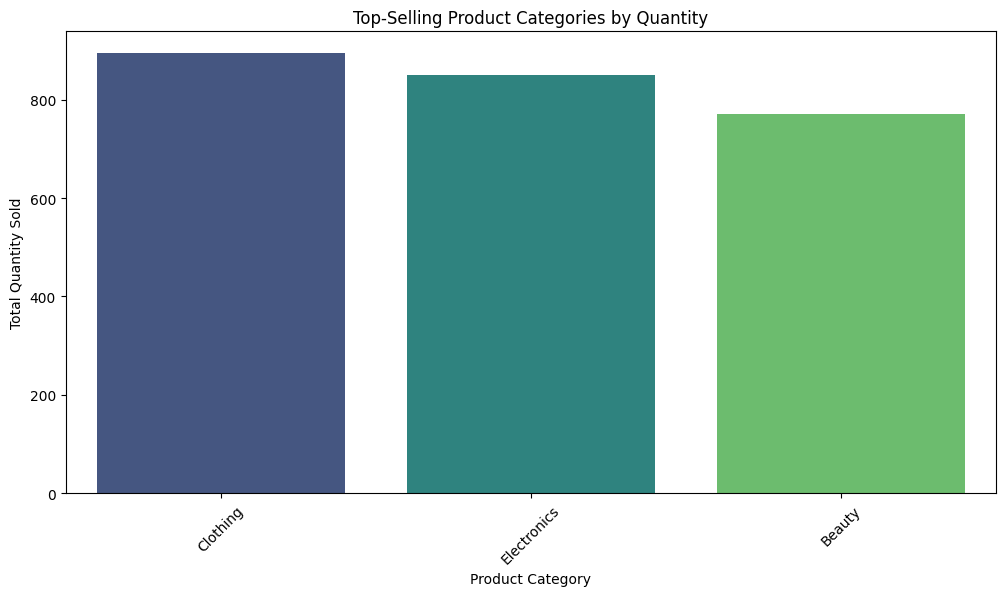

In [ ]:
top_selling_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette="viridis")
plt.title('Top-Selling Product Categories by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-9fa2f64b8070>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")


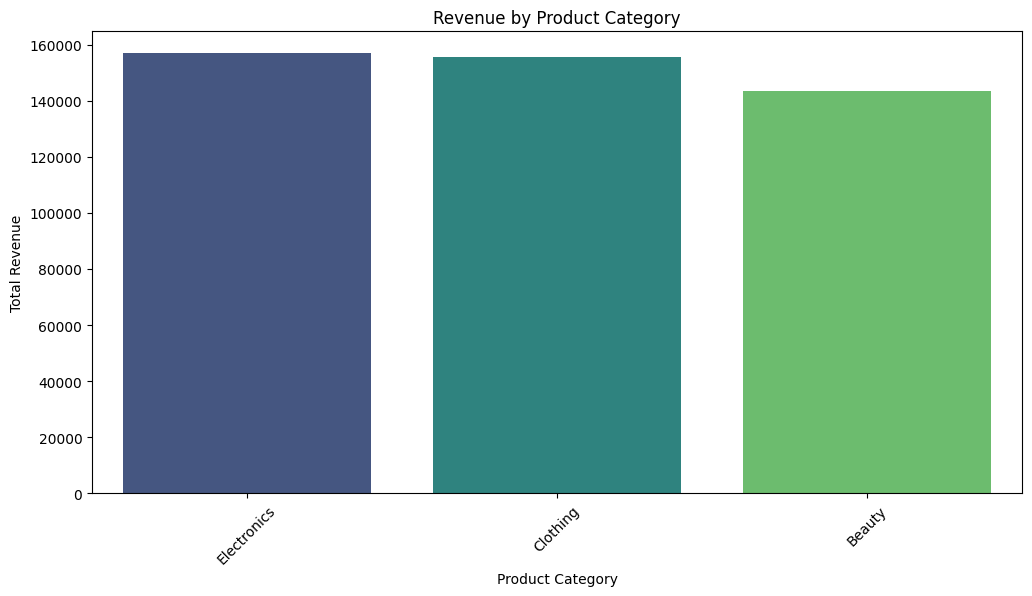

In [ ]:
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-f42e2bb75d03>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Price per Unit', y='Quantity', alpha=0.6, palette="viridis")


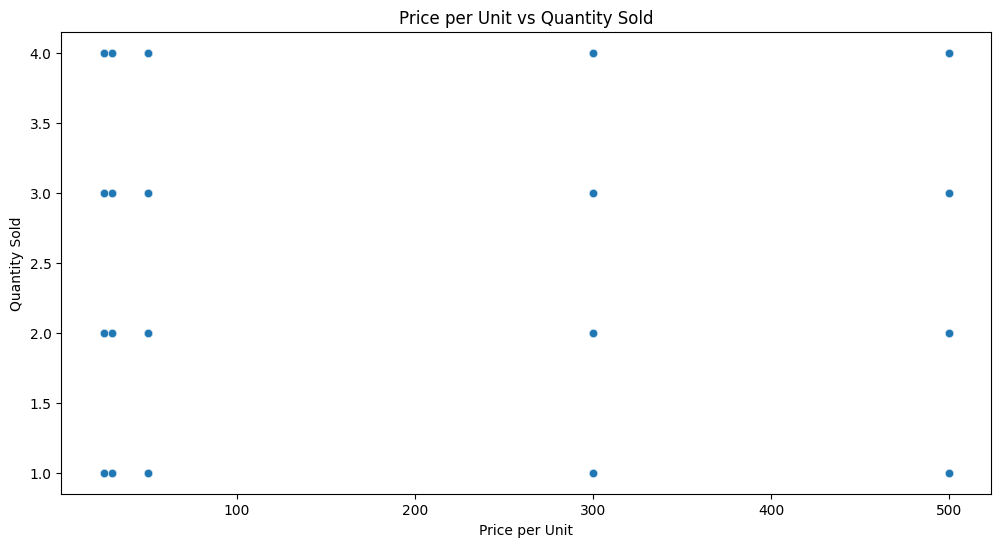

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Quantity', alpha=0.6, palette="viridis")
plt.title('Price per Unit vs Quantity Sold')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("Top Products by Sales:")
print(top_products)

Top Products by Sales:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


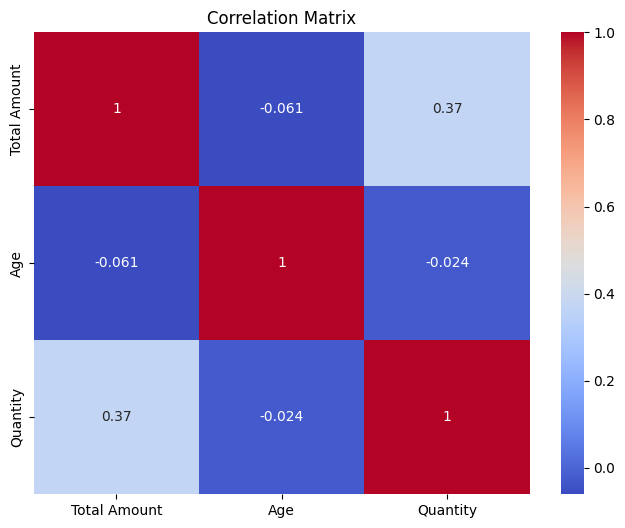

In [ ]:
correlation_matrix = df[['Total Amount', 'Age', 'Quantity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()